In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car_df=pd.read_csv('DS1_C4_S7_Car_Data_Challenge.csv')

In [4]:
car_df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1271,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
# task 1

In [6]:

selected_columns = ['Cylinders', 'Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre',
                    'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque']


missing_columns = set(selected_columns) - set(car_df.columns)


car_df_copy = car_df.copy()

if not missing_columns:
    car_df_copy = car_df_copy[selected_columns]
    car_df_copy.dropna(subset=['Power', 'Torque'], inplace=True)


print(car_df_copy)


      Cylinders Kerb_Weight        Make  Displacement  \
0           2.0      660 kg        Tata         624.0   
1           2.0      725 kg        Tata         624.0   
2           2.0      710 kg        Tata         624.0   
3           2.0      725 kg        Tata         624.0   
4           2.0      725 kg        Tata         624.0   
...         ...         ...         ...           ...   
1270        4.0     1170 kg       Honda        1498.0   
1271        4.0     1175 kg       Honda        1498.0   
1272        4.0     1107 kg       Honda        1497.0   
1273        4.0     1080 kg       Honda        1497.0   
1274        4.0     2335 kg  Mitsubishi        3200.0   

      Fuel_Tank_Capacity_litre  City_Mileage_km_litre  \
0                         24.0                  23.60   
1                         24.0                  23.60   
2                         15.0                    NaN   
3                         24.0                  23.60   
4                         24.0

In [14]:
#task 2

In [15]:

car_df_copy['Kerb_Weight'] = car_df_copy['Kerb_Weight'].astype(str).str.replace(r"kg", '') 
car_df_copy['Kerb_Weight'] = car_df_copy['Kerb_Weight'].str.split('-').str[0]  
car_df_copy['Kerb_Weight'] = pd.to_numeric(car_df_copy['Kerb_Weight'], errors='coerce')  


car_df_copy['Kerb_Weight'].fillna(0, inplace=True)
car_df_copy['Kerb_Weight'] = car_df_copy['Kerb_Weight'].astype(int)
car_df_copy['Kerb_Weight'] = car_df_copy['Kerb_Weight'] * 2.2 


car_df_copy["Power"] = car_df_copy["Power"].str.strip()  
car_df_copy['Power'] = car_df_copy['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*", '', regex=True) 

car_df_copy["Torque"] = car_df_copy["Torque"].str.strip()  
car_df_copy['Torque'] = car_df_copy['Torque'].str.replace(r"-", '', regex=True)  
car_df_copy['Torque'] = car_df_copy['Torque'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*", '', regex=True) 
car_df_copy['Torque'] = pd.to_numeric(car_df_copy['Torque'], errors='coerce') 

print(car_df_copy)

      Cylinders  Kerb_Weight        Make  Displacement  \
0           2.0       3194.4        Tata         624.0   
1           2.0       3509.0        Tata         624.0   
2           2.0       3436.4        Tata         624.0   
3           2.0       3509.0        Tata         624.0   
4           2.0       3509.0        Tata         624.0   
...         ...          ...         ...           ...   
1270        4.0       5662.8       Honda        1498.0   
1271        4.0       5687.0       Honda        1498.0   
1272        4.0       5357.0       Honda        1497.0   
1273        4.0       5227.2       Honda        1497.0   
1274        4.0      11301.4  Mitsubishi        3200.0   

      Fuel_Tank_Capacity_litre  City_Mileage_km_litre  \
0                         24.0                  23.60   
1                         24.0                  23.60   
2                         15.0                    NaN   
3                         24.0                  23.60   
4                 

In [16]:
# task 3

Statistics for Tata:
Cylinders:
  Mean: 3.44
  Median: 4.00
  Standard Deviation: 0.62
  Coefficient of Variation: 17.91%

Displacement:
  Mean: 1393.32
  Median: 1199.00
  Standard Deviation: 401.59
  Coefficient of Variation: 28.82%

Fuel_Tank_Capacity_litre:
  Mean: 42.20
  Median: 44.00
  Standard Deviation: 9.13
  Coefficient of Variation: 21.64%

City_Mileage_km_litre:
  Mean: 19.23
  Median: 19.20
  Standard Deviation: 4.69
  Coefficient of Variation: 24.37%

Highway_Mileage_km_litre:
  Mean: 20.50
  Median: 23.00
  Standard Deviation: 3.41
  Coefficient of Variation: 16.61%

Statistics for Datsun:
Cylinders:
  Mean: 3.00
  Median: 3.00
  Standard Deviation: 0.00
  Coefficient of Variation: 0.00%

Displacement:
  Mean: 1065.07
  Median: 1198.00
  Standard Deviation: 179.47
  Coefficient of Variation: 16.85%

Fuel_Tank_Capacity_litre:
  Mean: 32.20
  Median: 35.00
  Standard Deviation: 3.55
  Coefficient of Variation: 11.02%

City_Mileage_km_litre:
  Mean: 20.95
  Median: 20.60
 

C:\Users\Rasireddy Theja\AppData\Local\Temp\ipykernel_18412\3734892868.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturer_data[column] = pd.to_numeric(manufacturer_data[column], errors='coerce')


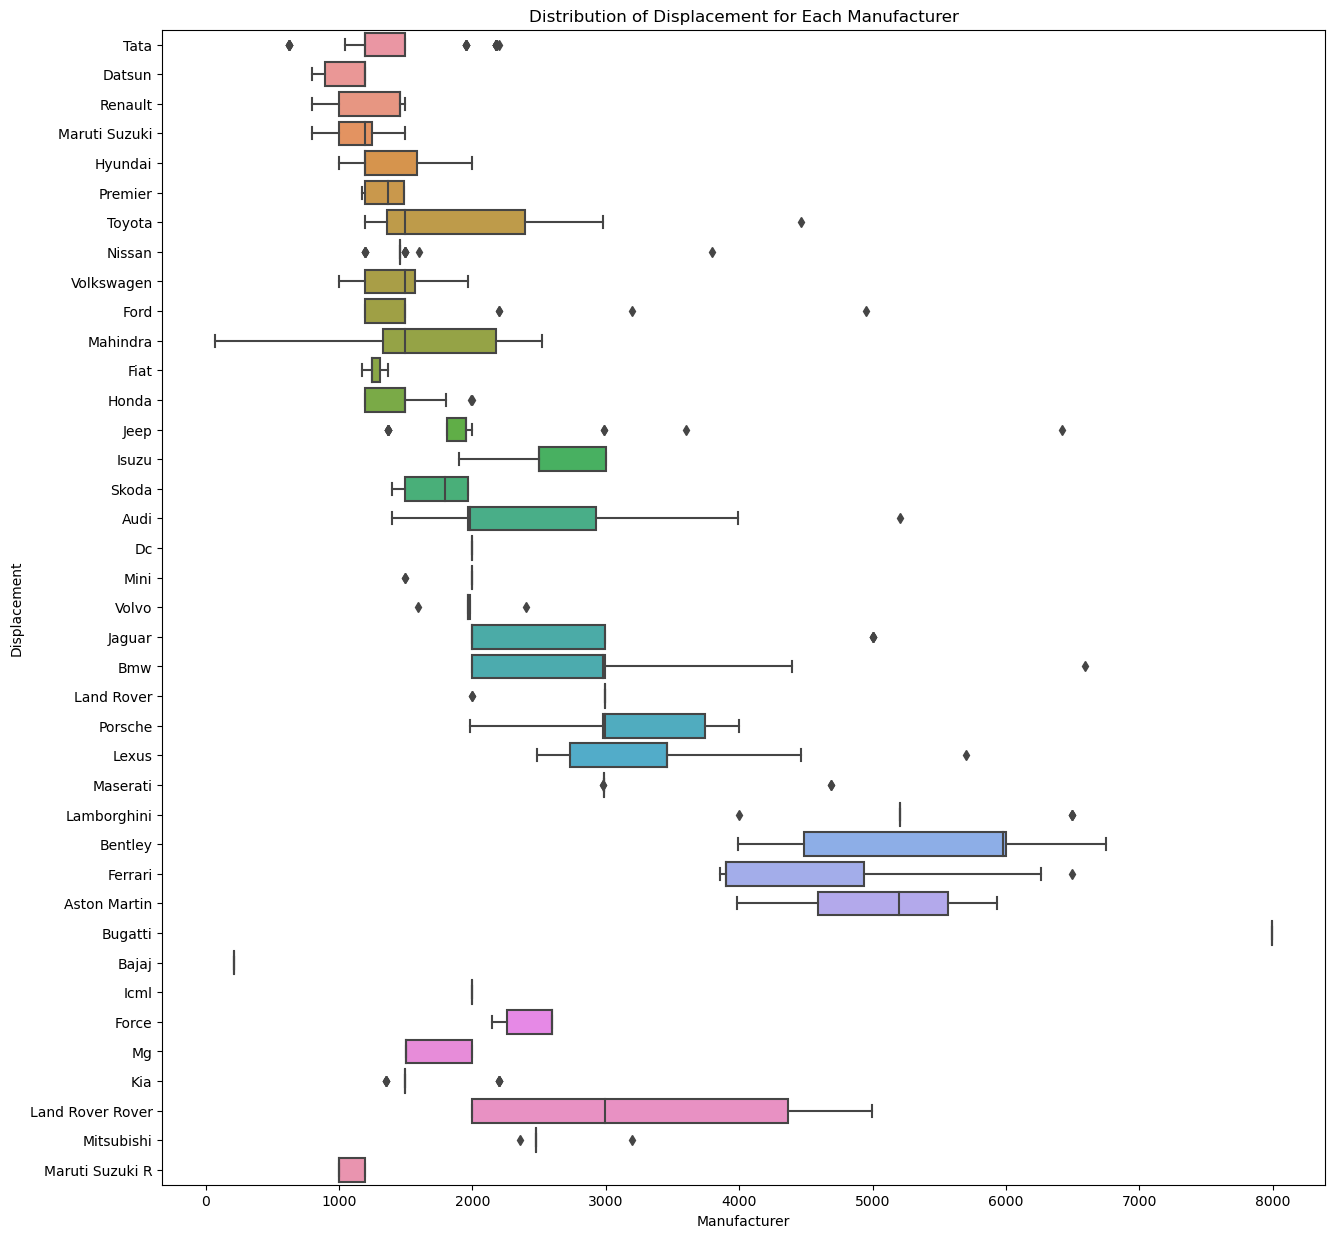

In [28]:

selected_columns = ['Cylinders', 'Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre',
                    'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque']

missing_columns = set(selected_columns) - set(car_df.columns)
car_df_copy = car_df.copy()

if not missing_columns:
    car_df_copy = car_df_copy[selected_columns]
    car_df_copy.dropna(subset=['Power', 'Torque'], inplace=True)


manufacturers = car_df_copy['Make'].unique()

for manufacturer in manufacturers:
    manufacturer_data = car_df_copy[car_df_copy['Make'] == manufacturer]
    print(f"Statistics for {manufacturer}:")
    for column in selected_columns:
        if column != 'Make':
         
            if column == 'Displacement':
                manufacturer_data[column] = pd.to_numeric(manufacturer_data[column], errors='coerce')
            
            if manufacturer_data[column].dtype == 'float64' or manufacturer_data[column].dtype == 'int64':
                mean_val = manufacturer_data[column].mean()
                median_val = manufacturer_data[column].median()
                std_val = manufacturer_data[column].std()
                cv_val = std_val / mean_val * 100 if mean_val != 0 else 0

                print(f"{column}:")
                print(f"  Mean: {mean_val:.2f}")
                print(f"  Median: {median_val:.2f}")
                print(f"  Standard Deviation: {std_val:.2f}")
                print(f"  Coefficient of Variation: {cv_val:.2f}%")
                print()


plt.figure(figsize=(15, 15))
sns.boxplot(y='Make', x='Displacement', data=car_df_copy)
plt.title('Distribution of Displacement for Each Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.show()



In [29]:
# task4

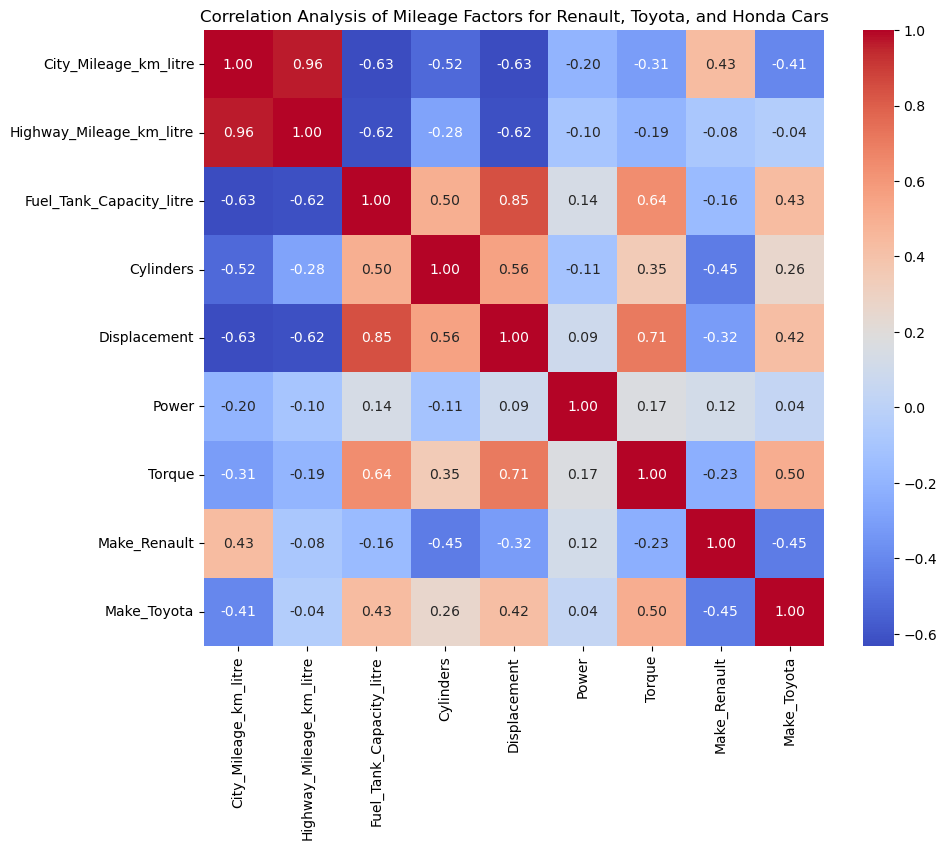

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_numeric(value):
    try:
        return float(''.join(filter(str.isdigit, str(value))))
    except ValueError:
        return None

car_df["Power"] = car_df["Power"].apply(clean_numeric)
car_df["Torque"] = car_df["Torque"].apply(clean_numeric)


car_df = car_df.dropna(subset=['Torque'])

selected_columns = ['Make', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Fuel_Tank_Capacity_litre', 'Cylinders', 'Displacement', 'Power', 'Torque']


selected_manufacturers = ['Renault', 'Toyota', 'Honda']
filtered_data = car_df[car_df['Make'].isin(selected_manufacturers)][selected_columns]


filtered_data = pd.get_dummies(filtered_data, columns=['Make'], drop_first=True)

correlation_matrix = filtered_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Analysis of Mileage Factors for Renault, Toyota, and Honda Cars')
plt.show()
